In [2]:
import numpy as np 
import pandas as pd 
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

In [3]:
from glob import glob

In [4]:
data = glob('BCH/BCH/**/*.png', recursive=True)

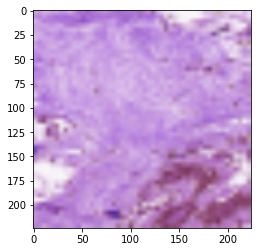

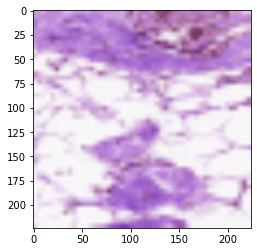

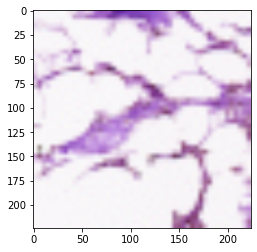

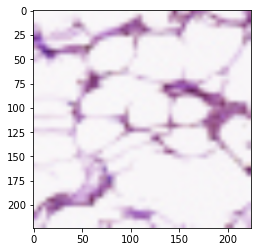

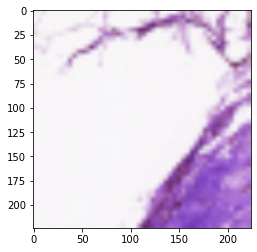

In [5]:
import cv2
import matplotlib.pyplot as plt
for i in data[:5]:
    img=cv2.imread(i)
    img_1=cv2.resize(img,(224,224))
    plt.imshow(img_1,cmap='binary')
    plt.show()

In [6]:
print(len(data))

555048


In [7]:
images=[]
labels=[]
for i in data[:1000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(224, 224))
        images.append(img_1)
        labels.append(label)

In [8]:
x=np.stack(images)

In [9]:
print(x.shape)

(1000, 224, 224, 3)


In [10]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

In [11]:
#normalize the data
x=x/255

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [13]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers

In [14]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(2,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])



C:\Users\Asus\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [15]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])

In [16]:
y_train = np.array(y_train)

In [17]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.4, batch_size=56)

Epoch 1/10
9/9 [==============================] - 63s 7s/step - loss: 0.6231 - acc: 0.6667 - val_loss: 0.5816 - val_acc: 0.7250
Epoch 2/10
9/9 [==============================] - 59s 7s/step - loss: 0.4182 - acc: 0.9042 - val_loss: 0.4313 - val_acc: 0.8750
Epoch 3/10
9/9 [==============================] - 58s 6s/step - loss: 0.3070 - acc: 0.9604 - val_loss: 0.3548 - val_acc: 0.9094
Epoch 4/10
9/9 [==============================] - 58s 7s/step - loss: 0.2295 - acc: 0.9688 - val_loss: 0.3164 - val_acc: 0.9312
Epoch 5/10
9/9 [==============================] - 59s 7s/step - loss: 0.1972 - acc: 0.9688 - val_loss: 0.2937 - val_acc: 0.9406
Epoch 6/10
9/9 [==============================] - 57s 6s/step - loss: 0.1492 - acc: 0.9896 - val_loss: 0.2783 - val_acc: 0.9438
Epoch 7/10
9/9 [==============================] - 57s 6s/step - loss: 0.1212 - acc: 0.9917 - val_loss: 0.2671 - val_acc: 0.9500
Epoch 8/10
9/9 [==============================] - 57s 6s/step - loss: 0.1117 - acc: 0.9937 - val_loss: 0

In [18]:
loss, accuracy = model.evaluate(x_test,y_test)

7/7 [==============================] - 4s 574ms/step - loss: 0.2377 - acc: 0.9450


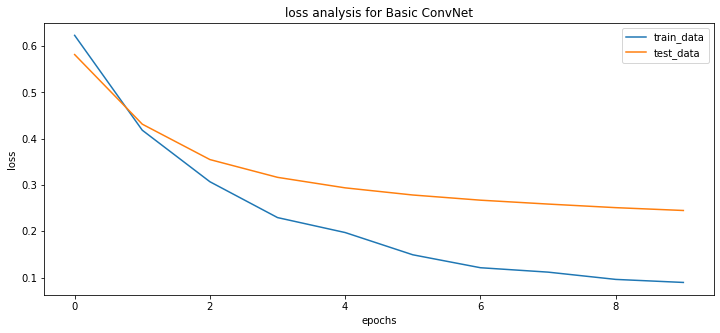

In [19]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('loss analysis for Basic ConvNet')
plt.show()

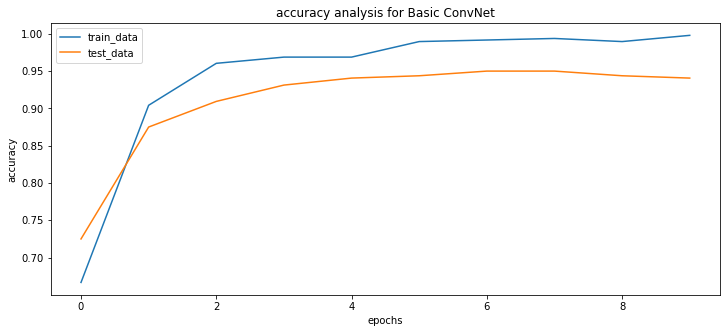

In [20]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis for Basic ConvNet')
plt.show()